In [1]:
%load_ext pycodestyle_magic
%flake8_on
# la convention PEP8 est ainsi testée

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler, QuantileTransformer, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
%matplotlib inline

6:80: E501 line too long (98 > 79 characters)
7:80: E501 line too long (92 > 79 characters)
1: E999 SyntaxError: invalid syntax


In [24]:
# Pour afficher toutes les colonnes
pd.options.display.max_columns = 100

In [6]:
data = pd.read_csv('Data/data.csv')

In [18]:
# passer le customer_unique_id en index
data = data.rename(index=data['customer_unique_id'])

In [19]:
data.columns.size

39

In [23]:
data.sample(3)

,order_purchase_year,order_purchase_month,purchase_time_zone_cat,effective_delivery_time,delivery_vs_estimated,delivery_vs_estimated_lvl,items_qty,products_qty,total_price,freight_percentage,freight_percentage_lvl,total_price_lvl,charmed_price_cat,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_size,product_photos_qty_lvl,product_cat,main_payment_type,payment_sequence_size,payment_installments_size,payment_sequence_size_cat,payment_installment_size_cat,main_payment_type_cat,payment_lvl,seller_state,customer_unique_id,customer_state,cust_sell_dist,cust_sell_dist_lvl,review_answer_delay,review_answer_delay_lvl,product_review_mean,product_review_mean_lvl,customer_review_mean,review_gap,review_gap_lvl
a84c2369d0550329ec9509ed225e210f,2017,11,WE,11,12,Nominal_Delivery,single_item,single_product,38.99,27.916436,High_FreightCost,C,Charmed_Price,60.0,517.0,4.0,200.0,1344.0,4,Electronics Computers & Accessories,credit_card,1.0,1.0,mono_payment,single_payment,Credit_Card_PayType,Light_Payment,SP,a84c2369d0550329ec9509ed225e210f,MG,455.917335,AroundMed_Dist,13,Late_Answer,3.625000,Low_Score,5.0,1.375000,Better_Review
1575832dec542a1d01925ef9155990dc,2017,8,AM-WD,3,11,Nominal_Delivery,single_item,single_product,67.00,12.154189,Low_FreightCost,D,Uncharmed_Price,35.0,100.0,3.0,410.0,3600.0,3,Entertainement,credit_card,1.0,7.0,mono_payment,single_payment,Credit_Card_PayType,UnderMed_Payment,SP,1575832dec542a1d01925ef9155990dc,SP,73.864416,Near_Dist,3,Late_Answer,4.666667,Top_Score,5.0,0.333333,Better_Review
5ccd4f1e3a2de9f3f8eb2dfbc3372ee5,2017,8,AM-WD,19,22,Sooner_Delivery,single_item,single_product,59.90,38.796363,High_FreightCost,D,Charmed_Price,58.0,340.0,2.0,1500.0,19800.0,2,Construction & Tools,credit_card,1.0,4.0,mono_payment,single_payment,Credit_Card_PayType,UnderMed_Payment,SP,5ccd4f1e3a2de9f3f8eb2dfbc3372ee5,RN,2261.381854,Far_Dist,1,Early_Answer,3.984709,Low_Score,5.0,1.015291,Better_Review


# 1 From A to Z with Pipe

In [83]:
# features catégoriels
categorical_features = data.columns[data.columns.str.contains('_cat')]

In [84]:
# features numériques
numerical_features = data.select_dtypes(include='number').columns.

In [93]:
# consolider la liste des features
features_list = list(categorical_features)
features_list.extend(list(numerical_features))
len(features_list)

25

In [95]:
# projeter sur un df dédié
data_filtered = data.filter(filtered_features)
data_filtered.shape

(87086, 25)

In [96]:
# initialisation n_clusters
n_clusters = 3

In [97]:
# steps de transformations pour chaque type de feature
numerical_pipeline = Pipeline(
    steps=[
        ('rankgauss', QuantileTransformer(n_quantiles=100,
                                          random_state=111,
                                          output_distribution='normal')),
        ('scaler', StandardScaler())
    ]
)
categorical_pipeline = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [98]:
# step de transformation commun
mytransformer = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)])


In [119]:
# introduire une PCA
mypreprocessor = Pipeline(
    [
        ('transformer', mytransformer),
        ('pca', PCA(n_components=2, random_state=42))
    ])

In [99]:
# step de clusterisation
myclusterer = Pipeline(
    [
        ('kmeans', KMeans(n_clusters=n_clusters)),
        ('hclust', AgglomerativeClustering(n_clusters=n_clusters))
    ])

In [120]:
# définition du pipe 2 steps + PCA
mypipe = Pipeline(steps=[('preprocessor', mypreprocessor),
                         ('clusterer', myclusterer)])

In [121]:
# echantillonnage (10%)
data_sample = pd.DataFrame(data_filtered).sample(
    int(data.shape[0]/10),
    random_state=42)
data_sample.shape

(8708, 25)

In [122]:
mypipe.fit(data_sample)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('transformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('rankgauss',
                                                                                    QuantileTransformer(n_quantiles=100,
                                                                                                        output_distribution='normal',
                                                                                                        random_state=111)),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['order_purchase_year', 'order_purchase_month',
       'effective_delivery_time', 'delivery_vs_e

In [147]:
preprocessed_data = mypipe['preprocessor'].transform(data_sample)

In [127]:
# deprecated : récupération des features name après onehot encoding
# mypipe.named_steps['transformer'].transformers_[1][1]\
#   .named_steps['onehot'].get_feature_names(categorical_features)

In [145]:
hclust_labels = mypipe['clusterer']['hclust'].fit_predict(preprocessed_data)

In [148]:
mypipe['clusterer']['hclust'].labels_

array([2, 0, 2, ..., 1, 1, 2], dtype=int64)

In [130]:
kmeans_labels = mypipe['clusterer']['kmeans'].fit_predict(preprocessed_data)

In [131]:
silhouette_score(preprocessed_data, hclust_labels)

0.2976044233069414

In [132]:
silhouette_score(preprocessed_data, kmeans_labels)

0.3625198118091504

### tunning both methods as a n_clusters function

In [149]:
# empty scores list
hclust_silhouette_scores = []
kmeans_silhouette_scores = []

In [190]:
for n in range(2, 11):
    # This set the number of clusters,
    # but leaves other steps unchanged
    mypipe['clusterer'].n_clusters = n
    mypipe.fit(data_sample)

    hclust_silhouette_coef = silhouette_score(
        mypipe['preprocessor'].transform(data_sample),
        mypipe['clusterer']['hclust'].labels_,
    )

    kmeans_silhouette_coef = silhouette_score(
        mypipe['preprocessor'].transform(data_sample),
        mypipe['clusterer']['kmeans'].labels_,
    )

    # Add metrics to their lists
    hclust_silhouette_scores.append(hclust_silhouette_coef)
    kmeans_silhouette_scores.append(kmeans_silhouette_coef)


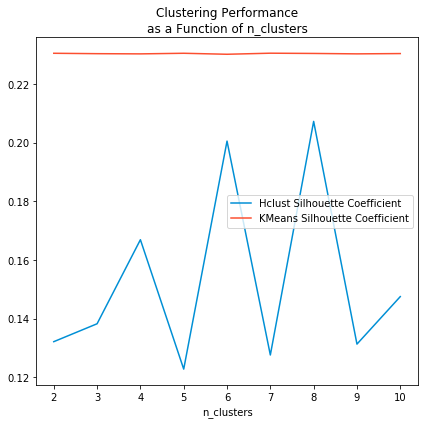

In [152]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 11),
    hclust_silhouette_scores,
    c="#008fd5",
    label="Hclust Silhouette Coefficient"
)
plt.plot(
    range(2, 11),
    kmeans_silhouette_scores,
    c="#fc4f30",
    label="KMeans Silhouette Coefficient"
)

plt.xlabel("n_clusters")
plt.legend()
plt.title("Clustering Performance\nas a Function of n_clusters")
plt.tight_layout()
plt.show()

### tuning PCA n_components

In [153]:
# empty scores list
hclust_silhouette_scores = []
kmeans_silhouette_scores = []

In [154]:
for n in range(2, 5):
    # This set the number of PCA components,
    # but leaves other steps unchanged
    mypipe['preprocessor']['pca'].n_components = n
    mypipe.fit(data_sample)

    hclust_silhouette_coef = silhouette_score(
        mypipe['preprocessor'].transform(data_sample),
        mypipe['clusterer']['hclust'].fit_predict(preprocessed_data),
    )

    kmeans_silhouette_coef = silhouette_score(
        mypipe['preprocessor'].transform(data_sample),
        mypipe['clusterer']['kmeans'].fit_predict(preprocessed_data),
    )

    # Add metrics to their lists
    hclust_silhouette_scores.append(hclust_silhouette_coef)
    kmeans_silhouette_scores.append(kmeans_silhouette_coef)


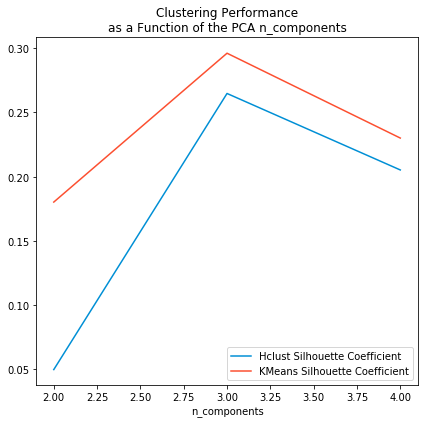

In [156]:
plt.figure(figsize=(6, 6))
plt.plot(
    range(2, 5),
    hclust_silhouette_scores,
    c="#008fd5",
    label="Hclust Silhouette Coefficient"
)
plt.plot(
    range(2, 5),
    kmeans_silhouette_scores,
    c="#fc4f30",
    label="KMeans Silhouette Coefficient"
)

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance\nas a Function of the PCA n_components")
plt.tight_layout()
plt.show()

## 2-D scat plot in case of PCA n_components = 2 : emphasizing hclust & kmeans distinction

In [158]:
# build a 2-D scatter plot
mypipe['preprocessor']['pca'].n_components = 2
mypipe
mypipe.fit(data_sample)

pcadf = pd.DataFrame(
    mypipe['preprocessor'].transform(data_sample),
    columns=['component_1', 'component_2'],
)

pcadf['hclust_cluster'] = mypipe['clusterer']['hclust'].labels_
pcadf['kmeans_cluster'] = mypipe['clusterer']['kmeans'].labels_

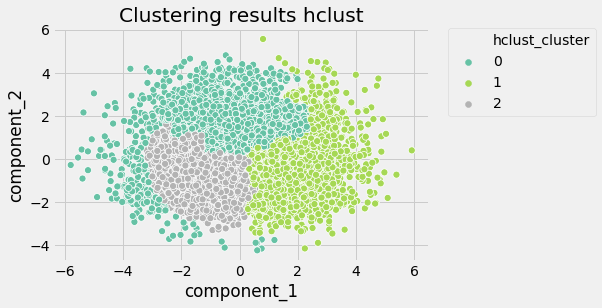

In [195]:
plt.scat = sns.scatterplot(
    'component_1',
    'component_2',
    s=50,
    data=pcadf,
    hue='hclust_cluster',
    palette='Set2')

plt.title(
    'Clustering results hclust')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

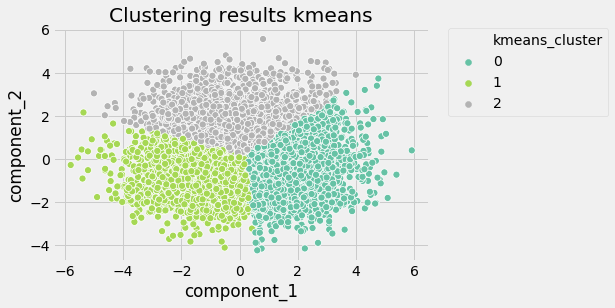

In [189]:
plt.scat = sns.scatterplot(
    'component_1',
    'component_2',
    s=50,
    data=pcadf,
    hue='kmeans_cluster',
    palette='Set2',
)
plt.title(
    'Clustering results kmeans'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## 3-D scat plot, case of PCA n_components = 3 (best case) & n_cluster = 6

In [196]:
# build a 3 components round
mypipe['preprocessor']['pca'].n_components = 3
mypipe['clusterer'].n_clusters = 6
mypipe.fit(data_sample)

pcadf = pd.DataFrame(
    mypipe['preprocessor'].transform(data_sample),
    columns=['component_1', 'component_2', 'component_3'],
)

pcadf['hclust_cluster'] = mypipe['clusterer']['hclust'].labels_
pcadf['kmeans_cluster'] = mypipe['clusterer']['kmeans'].labels_

In [212]:
# build a 3-D graph
mygraph = go.Figure()

for C in list(pcadf.hclust_cluster.unique()):
    mygraph.add_trace(
        go.Scatter3d(
            x=pcadf[pcadf.hclust_cluster == C]['component_1'],
            y=pcadf[pcadf.hclust_cluster == C]['component_2'],
            z=pcadf[pcadf.hclust_cluster == C]['component_3'],
            mode='markers',
            marker_size=2,
            marker_line_width=1,
            name='Cluster ' + str(C)))


mygraph.update_layout(width=800,
                      height=800,
                      autosize=True,
                      showlegend=True,
                      scene=dict(
                          xaxis=dict(title='component_1',
                                     titlefont_color='black'),
                          yaxis=dict(title='component_2',
                                     titlefont_color='black'),
                          zaxis=dict(title='component_3',
                                     titlefont_color='black')),
                      font=dict(family="Gilroy",
                                color='black',
                                size=12))


In [211]:
# build a 3-D graph
mygraph = go.Figure()

for C in list(pcadf.kmeans_cluster.unique()):
    mygraph.add_trace(
        go.Scatter3d(
            x=pcadf[pcadf.kmeans_cluster == C]['component_1'],
            y=pcadf[pcadf.kmeans_cluster == C]['component_2'],
            z=pcadf[pcadf.kmeans_cluster == C]['component_3'],
            mode='markers',
            marker_size=2,
            marker_line_width=1,
            name='Cluster ' + str(C)))


mygraph.update_layout(width=800,
                      height=800,
                      autosize=True,
                      showlegend=True,
                      scene=dict(
                          xaxis=dict(title='component_1',
                                     titlefont_color='black'),
                          yaxis=dict(title='component_2',
                                     titlefont_color='black'),
                          zaxis=dict(title='component_3',
                                     titlefont_color='black')),
                      font=dict(family="Gilroy",
                                color='black',
                                size=12))


# 2. debuggin OneHot enc. through pipeline (loosing feature's names)
Cette section récupère les features names après OneHotEncoding

In [10]:
encoder = OneHotEncoder()

In [11]:
# features catégoriels
cat_features = data.columns[data.columns.str.contains('_cat')].tolist()

In [12]:
cat_features

['purchase_time_zone_cat',
 'charmed_price_cat',
 'product_cat',
 'payment_sequence_size_cat',
 'payment_installment_size_cat',
 'main_payment_type_cat']

In [13]:
data_encoded = encoder.fit_transform(data[cat_features])

In [14]:
data_encoded

<87086x28 sparse matrix of type '<class 'numpy.float64'>'
	with 522516 stored elements in Compressed Sparse Row format>

In [15]:
column_name = encoder.get_feature_names(cat_features)
one_hot_encoded_frame = pd.DataFrame(data_encoded.todense(), columns=column_name)

In [16]:
one_hot_encoded_frame

,purchase_time_zone_cat_AM-WD,purchase_time_zone_cat_Evening-WD,purchase_time_zone_cat_Night,purchase_time_zone_cat_PM-WD,purchase_time_zone_cat_WE,charmed_price_cat_Charmed_Price,charmed_price_cat_Uncharmed_Price,product_cat_Auto,product_cat_Construction & Tools,product_cat_Corporate,...,product_cat_Sports Leisure,product_cat_Supplies,product_cat_Telephony,product_cat_Watches Gifts Toys,payment_sequence_size_cat_mono_payment,payment_sequence_size_cat_multi_payment,payment_installment_size_cat_installed_payment,payment_installment_size_cat_single_payment,main_payment_type_cat_Credit_Card_PayType,main_payment_type_cat_Other_PayType
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87081,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
87082,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
87083,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
87084,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
